# Inversion of ERT transects

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from resipy import Project

ERTdatadir = 'data/ERT/'

In [4]:
# Parameters
extraction = 0.5 # 0.5 and 2.5

## Middelkerke

In [ ]:
# reading electrode position
dfm = pd.read_csv(ERTdatadir + 'electrode_locations_Middelkerke.csv')
elec = np.zeros((120, 3))
elec[:, 0] = dfm['distance'].values
dfm.head()

In [ ]:
# invert
km = Project()
km.createSurvey(ERTdatadir + '23082301.csv', ftype='Syscal')
km.setElec(elec)
km.filterAppResist(vmin=0)
km.showPseudo()
km.filterRecip() 
km.fitErrorPwl()
km.createMesh('trian')
km.showMesh()

In [ ]:
# invert
km.err = True  # use fitted error in the inversion
km.invert()

In [ ]:
# inverted transect
fig, ax = plt.subplots(figsize=(10, 4))
km.showResults(ax=ax, sens=False, attr='Resistivity(ohm.m)', vmin=0, vmax=20)

In [ ]:
# extract profiles
m_m = km.meshResults[0]
print(m_m)
print(m_m.dfm)

dfs = []
for i in range(dfm.shape[0]):
    row = dfm.loc[i, :]
    ie = m_m.dfm['X'].between(row['distance'] - extraction, row['distance'] + extraction) & m_m.dfm['Z'].gt(-5) # 0.5 and 2.5
    sdf = m_m.dfm[ie][['Z', 'Resistivity(ohm.m)']]
    sdf['Z'] = sdf['Z'].round(1)
    #sdf['Z'] = (sdf['Z'] * 2).round(1) / 2
    sdf = sdf.groupby('Z').mean().reset_index()
    sdf['easting'] = row['easting']
    sdf['northing'] = row['northing']
    sdf['ID'] = row['ID']
    dfs.append(sdf)
dfmi = pd.concat(dfs)

print(dfmi)
dfmi.to_csv(ERTdatadir + 'middelkerke-inv-ERT-'+str(extraction)+'.csv', index=False)

fig.savefig(ERTdatadir + 'middelkerke-inv-ERT-'+'.jpg', dpi=300)

In [ ]:
# figure of profiles
fig, ax = plt.subplots()
for el in dfm['ID'].unique():
    ie = dfm['ID'].eq(el)
    ax.plot(dfm[ie]['Resistivity(ohm.m)'], dfm[ie]['Z'], '-')
ax.set_xlabel('Resistivity [Ohm.m]')
ax.set_ylabel('Z [m]')
#fig.savefig(ERTdatadir + 'middelkerke-prof.jpg')

## Proefhoeve

In [5]:
# reading electrode position
dfp = pd.read_csv(ERTdatadir + 'electrode_locations_Proefhoeve.csv')
dfp = dfp[:-1]
elec = np.zeros((60, 3))
elec[:, 0] = dfp['distance'].values
dfp.head()

,ID,distance,easting,northing
0,1,30.0,107761.108,183310.609
1,2,29.5,107761.387,183310.199
2,3,29.0,107761.668,183309.785
3,4,28.5,107761.949,183309.372
4,5,28.0,107762.230,183308.958


Working directory is: c:\Users\gmendoza\AppData\Local\anaconda3\Lib\site-packages\resipy
clearing dirname
filterData: 0 / 993 quadrupoles removed.
182/993 reciprocal measurements found.
4 measurements error > 20 %
3 measurements outside [0,74.02322483964478] removed!
filterData: 4 / 990 quadrupoles removed.
4 measurements with greater than 20.0% reciprocal error removed!
Error model is R_err = 0.012 R_avg^1.444 (R^2 = 0.963)
Creating triangular mesh...done (25688 elements)


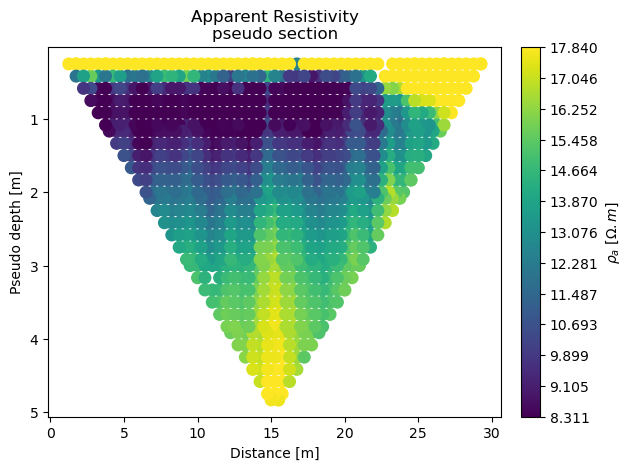

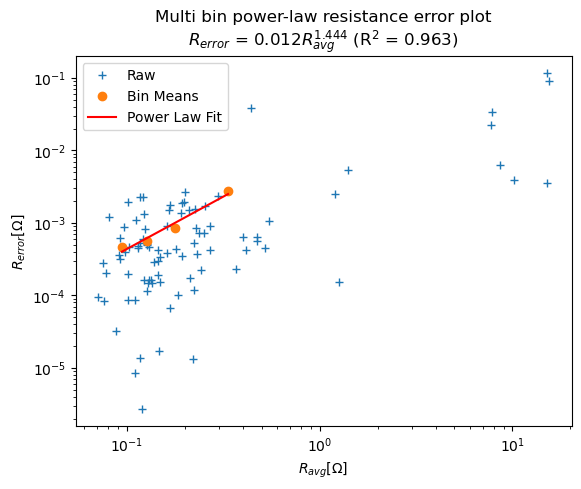

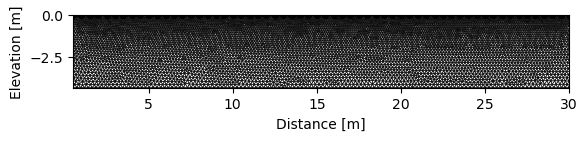

In [6]:
kp = Project()
kp.createSurvey(ERTdatadir + '23082201.csv', ftype='Syscal')
kp.setElec(elec)
kp.filterAppResist(vmin=0)
kp.showPseudo()
kp.filterRecip() 
kp.fitErrorPwl()
kp.createMesh('trian')
kp.showMesh()

In [7]:
# invert
kp.err = True  # use fitted error in the inversion
kp.invert()

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 04 - 07 - 2024
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<
 >> D a t a   w e i g h t   t o   b e   r e a d   f r o m   d a t a   f i l e <<


 Processing dataset   1


 Measurements read:   897     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.12897E+02

 

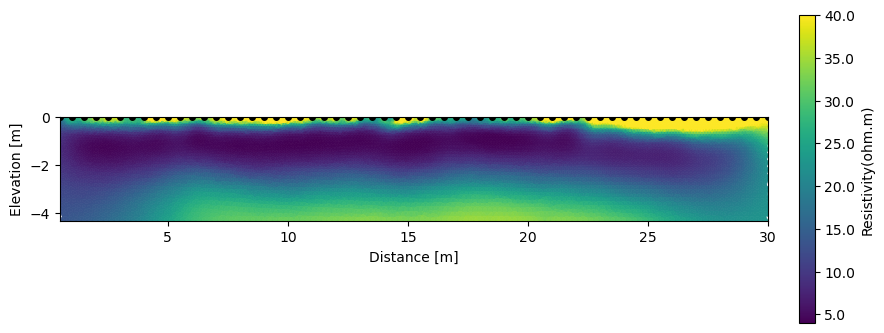

In [8]:
# inverted transect
fig, ax = plt.subplots(figsize=(10, 4))
kp.showResults(ax=ax, attr='Resistivity(ohm.m)', sens=False, vmin=4, vmax=40)


In [12]:
# extract profiles
mp = kp.meshResults[0]
pd.set_option('display.max_rows', None)
extraction = 2.5

dfsp = []
for i in range(dfp.shape[0]):
    row = dfp.loc[i, :] # Each row of the original ERT positions
    mask = mp.df['X'].between(row['distance'] - extraction, row['distance'] + extraction) & mp.df['Z'].gt(-5) # Mask for each element of the ERT 
    sdf = mp.df[mask][['Z', 'Resistivity(ohm.m)']] # Depth and resistivity of the filtered elements
    sdf['Z'] = sdf['Z'].round(1)
    sdf = sdf.groupby('Z').mean().reset_index() # Take the mean
    print('mask', i, np.sum(mask))
    sdf['easting'] = row['easting']
    sdf['northing'] = row['northing']
    sdf['ID'] = row['ID'] # After taking the mean, each profile is set in the original ID
    dfsp.append(sdf)
dfpi = pd.concat(dfsp)
dfpi.to_csv(ERTdatadir + 'proefhoeve-inv-ERT-'+str(extraction)+'.csv', index=False)

fig.savefig(ERTdatadir + 'proefhoeve-inv-ERT-'+'.jpg', dpi=300)

mask 0 1094
mask 1 1327
mask 2 1552
mask 3 1777
mask 4 2001
mask 5 2230
mask 6 2261
mask 7 2282
mask 8 2279
mask 9 2279
mask 10 2293
mask 11 2287
mask 12 2293
mask 13 2295
mask 14 2309
mask 15 2302
mask 16 2312
mask 17 2299
mask 18 2298
mask 19 2297
mask 20 2294
mask 21 2286
mask 22 2291
mask 23 2295
mask 24 2277
mask 25 2279
mask 26 2260
mask 27 2274
mask 28 2290
mask 29 2293
mask 30 2283
mask 31 2290
mask 32 2279
mask 33 2274
mask 34 2280
mask 35 2289
mask 36 2293
mask 37 2291
mask 38 2279
mask 39 2273
mask 40 2262
mask 41 2261
mask 42 2257
mask 43 2251
mask 44 2260
mask 45 2252
mask 46 2250
mask 47 2237
mask 48 2238
mask 49 2247
mask 50 2263
mask 51 2258
mask 52 2268
mask 53 2265
mask 54 2234
mask 55 2009
mask 56 1785
mask 57 1565
mask 58 1336
mask 59 1104


In [ ]:
# figure of profiles
fig, ax = plt.subplots()
for el in dfpi['ID'].unique():
    ie = dfpi['ID'].eq(el)
    ax.plot(dfpi[ie]['Resistivity(ohm.m)'], dfpi[ie]['Z'], '-')
ax.set_xlabel('Resistivity [Ohm.m]')
ax.set_ylabel('Z [m]')
#fig.savefig(datadir + 'proefhoeve-prof.jpg')